In [49]:
#Import modules
"""
    Sequential: This is the basic Keras model object. 
    It allows you to create a linear stack of layers that can be easily trained and evaluated.

    Activation: This is a layer object that applies an activation function 
    to the output of the previous layer. It is used to introduce non-linearity 
    into the model and can be used with various activation functions such as relu, sigmoid, and tanh.

    Flatten: This layer object is used to flatten the input into a 
    one-dimensional array. It is commonly used as the first layer of a 
    neural network when the input data is structured as a multi-dimensional array.

    Dense: This layer object creates a fully connected layer of neurons. 
    It takes the output of the previous layer and applies a linear 
    transformation to it, followed by an activation function. The Dense layer 
    has several parameters, such as the number of neurons, activation function, 
    and initialization method, that can be used to customize the layer.
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [50]:
#split data while loading data into training and testing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [51]:
# Turn data to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
#normalize data by dividing by 255 (luminosity range)
x_train /= 255
x_test /= 255

#Print data output
print("Feature matrix x train:", x_train.shape)
print("Target matrix x test:", x_test.shape)
print("Feature matrix y train:", y_train.shape)
print("Target matrix y test:", y_test.shape)

Feature matrix x train: (60000, 28, 28)
Target matrix x test: (10000, 28, 28)
Feature matrix y train: (60000,)
Target matrix y test: (10000,)


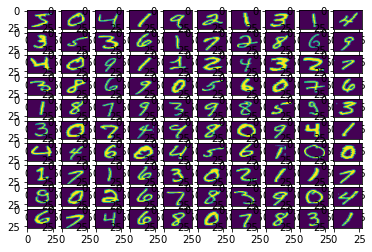

In [52]:
#plot a sample of the data in 28x28 pixels
#10 x 10 rows and columns
"""
The loop iterates over two ranges, i and j, and for each pair of i and j, it calls the imshow() function on the array element ax[i][j]. This function displays an image using the data in the array.
The image data is taken from the x_train array at index n, which is reshaped into a 28x28 pixel image.
The n variable is incremented by 1 for each iteration of the loop, so the next image in the x_train array will be used for the next iteration of the loop.
Once all images have been plotted, the plt.show() function is called to display the grid of images
"""
fig, ax = plt.subplots(10, 10)
n = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[n].reshape(28, 28), aspect='auto')
        n += 1
plt.show()

In [53]:
#tf creation of MLP model with sequential stack of layers
mlpModel = Sequential([
    #Reshape and flatten data to 28x28 rows
    Flatten(input_shape=(28, 28)),
    #Layer 1 of neurons, with sigmoid activation function
    Dense(200, activation='sigmoid'),  
    #Layer 2 of neurons, with sigmoid activation function
    Dense(100, activation='sigmoid'), 
    #Layer 3 of neurons, with sigmoid activation function
    Dense(10, activation='sigmoid'),  
])

In [54]:
"""
This code snippet is compiling a neural network model using the Keras library 
in Python.

The model is being compiled with the 'adam' optimizer, which is a popular 
stochastic gradient descent optimization algorithm that is often used in 
deep learning, and can improve training speed and accuracy of NN.

The loss function used is 'sparse_categorical_crossentropy', which is commonly 
used for multi-class classification problems where the labels are integers.

The metrics being used to evaluate the model during training and testing are 
'accuracy', which is a common metric used for classification problems to 
measure the percentage of correctly classified instances.

Overall, this code is configuring the model for training by specifying the 
optimizer, loss function, and evaluation metrics.
"""
mlpModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
#Model will iterate over the entire training dataset 20 times, 
#Batch size of 2000, so model will process 2000 training examples at a time 
#before updating weights
#Validation split is 0.25, so 25% of training data is used as validation
mlpModel.fit(x_train, y_train, epochs=20, 
          batch_size=2000, 
          validation_split=0.25)

Epoch 1/20
23/23 [==============================] - 3s 75ms/step - loss: 2.1761 - accuracy: 0.3639 - val_loss: 1.9202 - val_accuracy: 0.6701
Epoch 2/20
23/23 [==============================] - 2s 88ms/step - loss: 1.6723 - accuracy: 0.6820 - val_loss: 1.3611 - val_accuracy: 0.7496
Epoch 3/20
23/23 [==============================] - 1s 62ms/step - loss: 1.1573 - accuracy: 0.7816 - val_loss: 0.9331 - val_accuracy: 0.8216
Epoch 4/20
23/23 [==============================] - 1s 57ms/step - loss: 0.8221 - accuracy: 0.8361 - val_loss: 0.6799 - val_accuracy: 0.8645
Epoch 5/20
23/23 [==============================] - 1s 60ms/step - loss: 0.6226 - accuracy: 0.8676 - val_loss: 0.5304 - val_accuracy: 0.8848
Epoch 6/20
23/23 [==============================] - 1s 50ms/step - loss: 0.5017 - accuracy: 0.8854 - val_loss: 0.4419 - val_accuracy: 0.8953
Epoch 7/20
23/23 [==============================] - 1s 53ms/step - loss: 0.4274 - accuracy: 0.8968 - val_loss: 0.3868 - val_accuracy: 0.9021
Epoch 8/20
23

In [56]:
#Print results of model accuracy
results = mlpModel.evaluate(x_test,  y_test, verbose = 0)
print('Test loss & Test accuracy:', results)

Test loss & Test accuracy: [0.20260195434093475, 0.940500020980835]
